In [1]:
# Can I approximate playoff probs?  Linearly from ratings?

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import series_probs_compute as ssim

<AxesSubplot:>

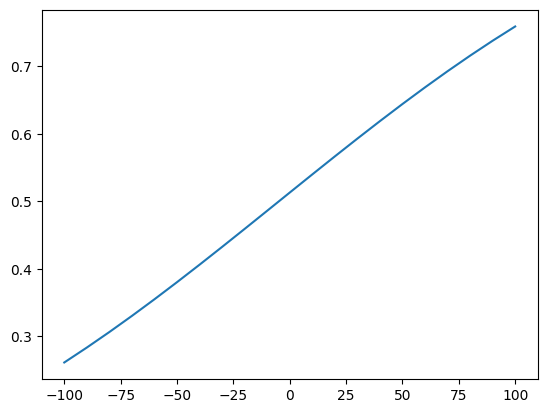

In [3]:
#  look at the distribution
base = 1500.0
probs = pd.Series({offset: ssim.p_series(5, base+offset, base) for offset in range(-100, 110, 10)})
probs.plot()

In [4]:
# looks like diminishing returns at both ends
probs.diff()

-100         NaN
-90     0.022065
-80     0.022995
-70     0.023852
-60     0.024623
-50     0.025298
-40     0.025866
-30     0.026318
-20     0.026647
-10     0.026847
 0      0.026916
 10     0.026852
 20     0.026656
 30     0.026332
 40     0.025884
 50     0.025320
 60     0.024649
 70     0.023880
 80     0.023026
 90     0.022099
 100    0.021111
dtype: float64

In [5]:
# Yeah, the curve flattens at both ends.  We can add an n^2 feature (actually abs(n)*n, to stay symmetric)
# Run a linear regression with an n and an n^2 feature
# The intercept represents HFA
def run_regression(num_games):
    base = 1500.0
    probs = {offset: ssim.p_series(num_games, base+offset, base) for offset in range(-100, 110, 10)}
    diffs = np.array(list(probs.keys()))
    diffs_sq = abs(diffs)* diffs
    X = list(zip(diffs, diffs_sq))
    y = list(probs.values())

    model = LinearRegression().fit(X, y)
    return {'intercept': model.intercept_, 'coeffs': model.coef_}

{n: run_regression(n) for n in (3, 5, 7)}


{3: {'intercept': 0.5487166161582245,
  'coeffs': array([ 2.18372656e-03, -1.50440176e-06])},
 5: {'intercept': 0.5118946934380574,
  'coeffs': array([ 2.77425761e-03, -2.80645606e-06])},
 7: {'intercept': 0.5096396566543989,
  'coeffs': array([ 3.26422337e-03, -4.25017182e-06])}}